In [1]:
import warnings
warnings.filterwarnings(action='ignore')

In [3]:
import pandas as pd
print(pd.__version__)

1.4.3


In [1]:
from preamble import *

### 왜 머신러닝인가?

    - 머신러닝은 데이터에서 지식을 추출하는 작업
    - 머신러닝은 통계학, 인공지능 그리고 컴퓨터 과학이 얽혀 있는 연구 분야
    - 예측분석이나 통계적 머신러닝으로 불림
    
  

In [5]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

In [6]:
print('iris_dataset의 키:\n', iris_dataset.keys())

iris_dataset의 키:
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [9]:
print(f'타깃이름 : {iris_dataset["target_names"]}')

타깃이름 : ['setosa' 'versicolor' 'virginica']


In [10]:
print(f'특성이름 : {iris_dataset["feature_names"]}')

특성이름 : ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [13]:
print(f'data타입 :{type(iris_dataset["data"])}')
iris = (iris_dataset['data'])

data타입 :<class 'numpy.ndarray'>


In [14]:
print(f'data의 크기: {iris.shape}')

data의 크기: (150, 4)


In [17]:
print(f'data의 처음 다섯 행: \n{iris[:5]}')

data의 처음 다섯 행: 
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [18]:
print(f'타깃:\n {iris_dataset["target"]}')

타깃:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


### 붓꽃 데이터 세트를 자세히 보기 위해 DataFrame으로 변환

In [21]:
iris_dataset = load_iris()
iris_data = iris_dataset.data

iris_df = pd.DataFrame(data=iris_data, columns=iris_dataset.feature_names)
iris_df['label']=iris_dataset.target
iris_df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


### 훈련 데이터와 테스트 데이터

   : 150개의 붓꽃 데이터를 traindata, testdata로 나누기
   
   -> 모델의 성능을 측정하기 위해 새 데이터 모델에 적용

#### scikit-learn train_test_split 함수로 데이터셋 나누기

    : 75%는 훈련세트, 15%는 테스트 세트로 데이터 셋 나눔
    
    - X: 데이터, y : 레이블명

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'],iris_dataset['target'], random_state=0)

In [25]:
print('X_train 크기: ',X_train.shape)
print('y_train 크기: ',y_train.shape)
print('X_test 크기: ',X_test.shape)
print('y_test 크기: ',y_test.shape)

X_train 크기:  (112, 4)
y_train 크기:  (112,)
X_test 크기:  (38, 4)
y_test 크기:  (38,)


### 가장 먼저 할 일: 데이터 살펴보기
* 머신 러닝 모델을 만들기 전에 머신러닝이 없어도 풀 수 있는 문제는 아닌지, 혹은 필요한 정보가 누락되지는 않았는지 데이터를 조사해보는 것이 좋다.
* 또한 데이터를 탐색하면서 비정상적인 값이나 특이한 값들을 찾을 수도 있다
* 시각화는 데이터를 조사하는 좋은 방법이다.
* 산점도가 그 중 하나이다.
* 산점도는 데이터에서 한 특성을 x축에 놓고 다른 하나는 y축에 놓아 각 데이터 포인트를 하나의 점으로 나타내는 그래프이다.
* 따라서 3개 이상의 특성을 표현하기 어렵다.
* numpy 배열을 pandas의 DataFrame으로 변경해야 한다.
* pandas는 산점도 행렬을 그려주는 scatter_matrix함수를 제공한다.
    
    

array([[<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='sepal length (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='sepal width (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='petal length (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='petal width (c

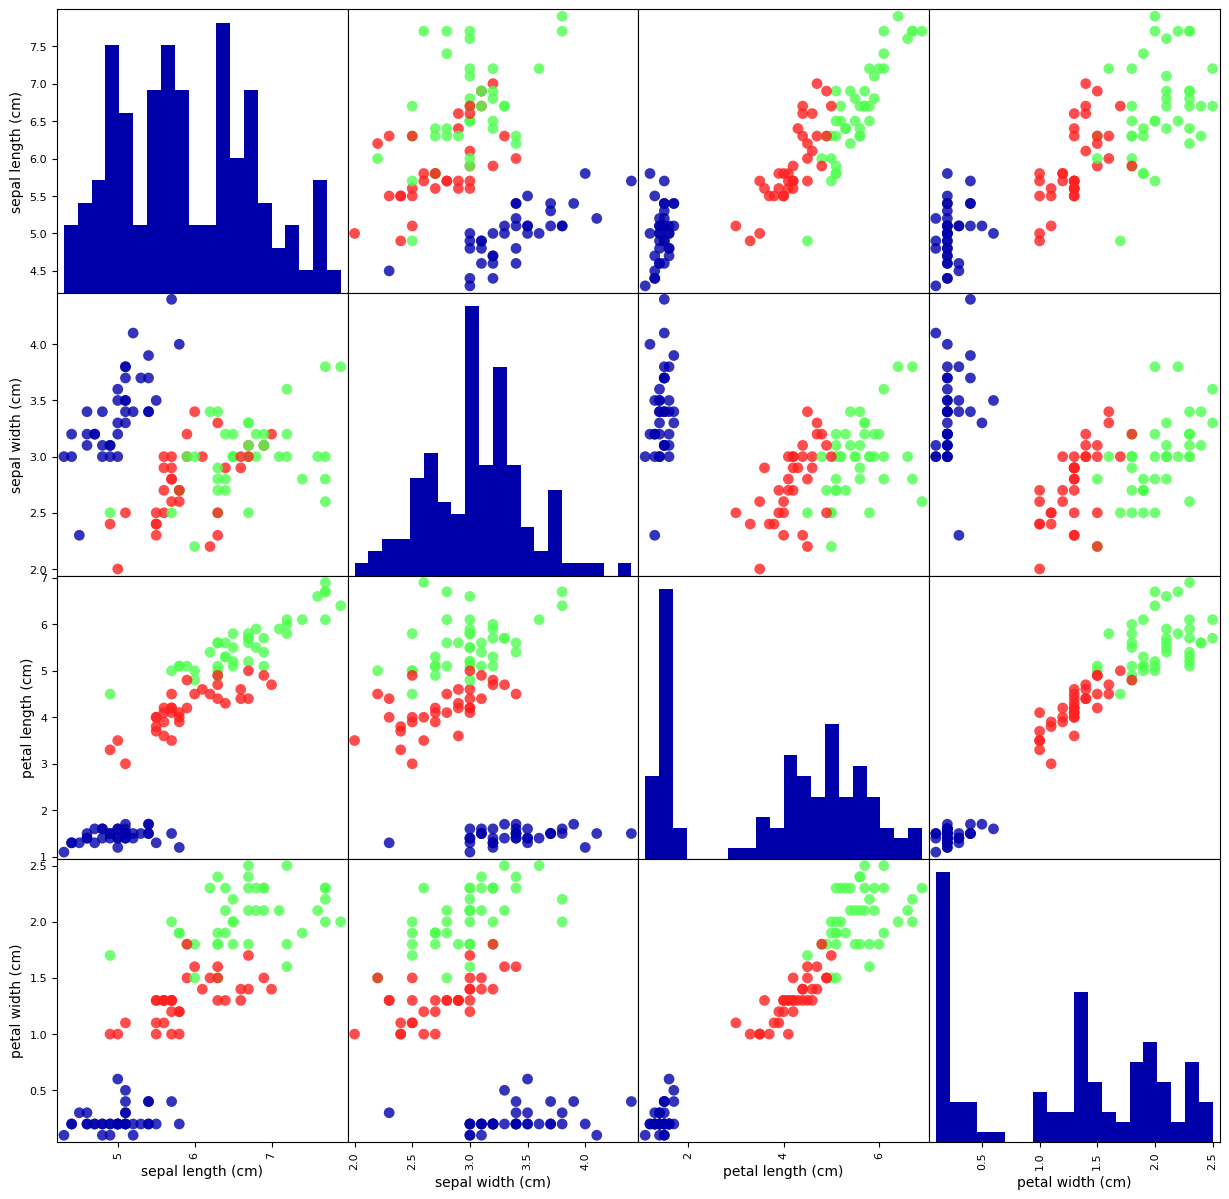

In [26]:
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)

pd.plotting.scatter_matrix(iris_dataframe, c=y_train, figsize=(15,15), marker='o',
                          hist_kwds={'bins':20}, s=60, alpha=.8, cmap=mglearn.cm3)

sklearn.dataset
    : 다양한 예제 데이터셋 제공
    
    Load 계열: scikit-learn 설치 패키지에 같이 포함된 소량의 데이터
    
        - load_boston: 회귀 분석용 보스턴 집값
        - load_diabetes : 회귀 분석용 당뇨병 자료
        - load_iris : 분류용 붓꽃 자료
        - load_wine : 분류용 포도주 등급 자료

## 1. KNN 최근접 이웃 알고리즘


* scikit-learn은 다양한 분류 알고리즘을 제공
* k-최근접 이웃 알고리즘은 새 데이터 포인트에서 가장 가까운 훈련 데이터 포인트를 찾음
* 그런 다음 찾은 훈련 데이터의 레이블을 새 데이터 포인트의 레이블로 지정
* k는 훈련데이터에서 새로운 데이터 포인트에 가장 가까운 'k'개의 이웃을 찾는다는 의미
* k-최근접 이웃 분류 알고리즘은 neighbor 모듈 아래 KNeighborsClassfier 클래스에 구현되어 있음
* 모델을 사용하려면 클래스로부터 객체를 만들어야 함
* 우선 이웃의 개수를 1개로 지정해서 만들어보자

In [30]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

#### 예측하기

In [32]:
X_new = np.array([[5,2.9,1,0.2]])
print('X_new.shape:', X_new.shape)

X_new.shape: (1, 4)


In [33]:
prediction = knn.predict(X_new)
print('예측', prediction)

예측 [0]


#### 모델 평가하기

In [34]:
y_pred = knn.predict(X_test)
print('테스트 세트에 대한 예측값: ',y_pred)

테스트 세트에 대한 예측값:  [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [35]:
print('테스트 세트의 정확도 : {:.2f}'.format(np.mean(y_pred==y_test)))

테스트 세트의 정확도 : 0.97


#### 요약

    - score(): 데이터 세트의 정확도 계산

In [36]:
X_train, X_test, y_train, y_test = train_test_split(
iris_dataset['data'],iris_dataset['target'],random_state=0)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

print('테스트 세트의 정확도: {:.2f}'.format(knn.score(X_test,y_test)))

테스트 세트의 정확도: 0.97


In [1]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
raw_iris = datasets.load_iris()

X = raw_iris.data
y = raw_iris.target

X_tn, X_te, y_tn, y_te = train_test_split(X,y,random_state=0)

In [4]:
#표준화 스케일
std_scale = StandardScaler()
std_scale.fit(X_tn)
X_tn_std = std_scale.transform(X_tn)
X_te_std = std_scale.transform(X_te)

In [6]:
#학습
clf_knn = KNeighborsClassifier(n_neighbors=2)
clf_knn.fit(X_tn_std, y_tn)

#예측
knn_pred = clf_knn.predict(X_te_std)

#정확도
accuracy = accuracy_score(y_te, knn_pred)

#confusion matrix 
conf_matrix = confusion_matrix(y_te, knn_pred)

#분류 리포트
class_report = classification_report(y_te, knn_pred)
print(class_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.94      0.94      0.94        16
           2       0.89      0.89      0.89         9

    accuracy                           0.95        38
   macro avg       0.94      0.94      0.94        38
weighted avg       0.95      0.95      0.95        38

